### imports

In [1]:
import pandas as pd
import numpy as np
import warnings
#warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('data/kickstarter_projects.csv')

In [3]:
df_original = df.copy

### first look / quick EDA

In [4]:
df.head()

ID                                               Name   
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...  \
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2  1703704063                                drawing for dollars   
3      727286                       Offline Wikipedia iPhone app   
4  1622952265                                         Pantshirts   

       Category   Subcategory        Country             Launched    Deadline   
0       Fashion       Fashion  United States  2009-04-21 21:02:48  2009-05-31  \
1  Film & Video        Shorts  United States  2009-04-23 00:07:53  2009-07-20   
2           Art  Illustration  United States  2009-04-24 21:52:03  2009-05-03   
3    Technology      Software  United States  2009-04-25 17:36:21  2009-07-14   
4       Fashion       Fashion  United States  2009-04-27 14:10:39  2009-05-26   

    Goal  Pledged  Backers       State  
0   1000      625       30      Failed  
1  80000       22        3      Failed  
2     20       35        3  Successful  
3     99      145       25  Successful  
4   1900      387       10      Failed

In [5]:
df.tail()

ID                                               Name   
374848  1486845240                  Americas Got Talent - Serious MAK  \
374849   974738310  EVO Planner: The World's First Personalized Fl...   
374850  2106246194    Help save La Gattara, Arizona's first Cat Cafe!   
374851  1830173355                                Digital Dagger Coin   
374852  1339173863                              Spirits of the Forest   

       Category     Subcategory        Country             Launched   
374848    Music         Hip-Hop  United States  2018-01-02 14:13:09  \
374849   Design  Product Design  United States  2018-01-02 14:15:38   
374850     Food            Food  United States  2018-01-02 14:17:46   
374851      Art             Art  United States  2018-01-02 14:38:17   
374852    Games  Tabletop Games          Spain  2018-01-02 15:02:31   

          Deadline   Goal  Pledged  Backers State  
374848  2018-01-16    500        0        0  Live  
374849  2018-02-09  15000      269        8  Live  
374850  2018-01-16  10000      165        3  Live  
374851  2018-02-01    650        7        1  Live  
374852  2018-01-26  24274     4483       82  Live

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [7]:
df.State.value_counts()


State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [8]:
df[df.State.isin(["Failed","Successful"])]

ID                                               Name   
0       1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...  \
1        709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2       1703704063                                drawing for dollars   
3           727286                       Offline Wikipedia iPhone app   
4       1622952265                                         Pantshirts   
...            ...                                                ...   
374310   749399445                               Propeller Spring 2.0   
374400  1223058036   The Cowboy and The Spaceman: Android Collective+   
374458  1411606124                               The CHAMPS Are Here!   
374530   156799983                                     Kill Them All!   
374605   801423615                      Collaboration with Snoop Dogg   

            Category     Subcategory         Country             Launched   
0            Fashion         Fashion   United States  2009-04-21 21:02:48  \
1       Film & Video          Shorts   United States  2009-04-23 00:07:53   
2                Art    Illustration   United States  2009-04-24 21:52:03   
3         Technology        Software   United States  2009-04-25 17:36:21   
4            Fashion         Fashion   United States  2009-04-27 14:10:39   
...              ...             ...             ...                  ...   
374310         Games           Games         Austria  2017-12-23 10:14:21   
374400         Games  Tabletop Games  United Kingdom  2017-12-26 13:00:24   
374458       Fashion         Apparel   United States  2017-12-27 03:52:38   
374530         Games  Tabletop Games   United States  2017-12-28 01:48:58   
374605         Music         Hip-Hop       Australia  2017-12-29 03:22:32   

          Deadline   Goal  Pledged  Backers       State  
0       2009-05-31   1000      625       30      Failed  
1       2009-07-20  80000       22        3      Failed  
2       2009-05-03     20       35        3  Successful  
3       2009-07-14     99      145       25  Successful  
4       2009-05-26   1900      387       10      Failed  
...            ...    ...      ...      ...         ...  
374310  2017-12-26     36      270       36  Successful  
374400  2017-12-31    271      545       25  Successful  
374458  2017-12-31    200      202        6  Successful  
374530  2017-12-30    250      265        7  Successful  
374605  2018-01-01    392      514        6  Successful  

[331462 rows x 11 columns]

### first pre-processing / feature engineering

#### Datetime

In [9]:
df["Launched"] = pd.to_datetime(df["Launched"])
df["Deadline"] = pd.to_datetime(df["Deadline"])

In [10]:
df["lon_launched"] = df["Launched"].dt.date
df["time_launched"] = df["Launched"].dt.time
df["day_launched"] = df["Launched"].dt.weekday
df["hour"] = df["Launched"].dt.hour 

#### Feature: time of the day

In [11]:
# Transform hour into sine and cosine components
# idea: we want to capture the idea that hour = 23 is close to hour = 1 (next day): both are "around midnight"
# this would not be the case if we treated hours as a standard numerical (or categorical) variable
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

#### Feature: day of the week

In [12]:
df["weekday"] = df["day_launched"].astype("category")

#### Feature: duration (number of days)

In [13]:
df["duration"] = (df["Deadline"] - df["Launched"]).dt.days

### Data cleaning

#### clean by state

In [14]:
df.State.value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64>

We decide to drop projects that are still live (outcome unclear), suspended or canceled (reasons unclear, hypothetical outcome in case of continuation unclear).

In [15]:
df = df[df.State.isin(["Failed","Successful"])]
df.replace({"Failed":0, "Successful":1}, inplace=True)     

/var/folders/3x/wdv8lh0d6l911ls0mrsxbsfm0000gn/T/ipykernel_20374/3501663737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Failed":0, "Successful":1}, inplace=True)


#### clean by duration

Note: Kickstarter reduced the upper duration limit from 90 to 60 days at some point _during_ the data collection phase (~2011). We throw out projects with a duration >60 days because this parameter choice became unavailable to projects after the change by the platform

In [16]:
df.query("duration >60").shape

(4136, 19)

In [17]:
df["duration"].unique()

array([39, 87,  8, 79, 28, 17, 29, 16, 48, 61, 65, 46, 36, 19, 35, 75, 30,
       34, 60, 27, 31, 25, 22, 55, 23, 52, 49, 80, 62,  9, 89, 72, 88, 59,
       58, 84, 32, 74, 41, 71, 51, 69, 73, 15, 21, 40, 43, 42, 57, 38, 37,
       86,  3, 20, 13, 10, 24, 66, 85, 64, 78, 54, 63, 47,  5, 83, 45, 50,
       44, 76,  7,  2,  4, 70,  6, 68, 67, 33, 56, 53, 82, 26, 77, 81, 12,
       18, 14,  1,  0, 11, 90, 91])

In [18]:
df = df.query("duration <= 60 ")
# we lose about 1% of the data

In [19]:
df.Launched.dt.year.value_counts()

Launched
2015    65266
2014    59303
2016    49092
2017    43419
2013    41084
2012    38478
2011    22465
2010     7597
2009      622
Name: count, dtype: int64

## More pre-processing / feature engineering

### Feature: goal - log scaling

Idea: account for the distribution of goal levels by applying logarithm.
To do this, we need to remove projects with a goal = 0 (also, they are not informative and there are just 3 of them)

apply log to "goal" target, turning it into a normally distributed variable
then cut off outliers (above & maybe also below)
this should cause us not to need scaling any more

In [20]:
df = df.query("Goal > 0")

In [21]:
df["goal_log"] = np.log(df['Goal'])

### Feature: goal - outlier identification

Here, we only identify the outliers. _Removal_ of the outliers comes _after_ the train-test-split.

Wikipedia on outliers:
> The interquartile range is often used to find outliers in data. Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR.

In [22]:
categories = df.Category.unique()

In [23]:
outliers = {}
outliers_log_above = {}
outliers_log_below = {}
for category in categories:
    df_temp = df.query("Category == @category")
    outliers[category] = df_temp.Goal.quantile(.75) + 1.5 * (df_temp.Goal.quantile(.75) - df_temp.Goal.quantile(.25))
    outliers_log_above[category] = df_temp.goal_log.quantile(.75) + 1.5 * (df_temp.goal_log.quantile(.75) - df_temp.goal_log.quantile(.25))
    outliers_log_below[category] = df_temp.goal_log.quantile(.25) - 1.5 * (df_temp.goal_log.quantile(.75) - df_temp.goal_log.quantile(.25))
    #print(f"cutoff for {category}: {outliers[category]}")

### A closer look / more EDA

how to success rates differ across (sub)categories?

In [24]:
df.groupby("Category").State.mean().sort_values()

Category
Technology      0.237885
Journalism      0.241860
Crafts          0.270419
Food            0.275484
Fashion         0.283134
Photography     0.340090
Publishing      0.347689
Design          0.416248
Film & Video    0.420434
Games           0.439187
Art             0.448796
Music           0.527511
Comics          0.593990
Theater         0.641687
Dance           0.655603
Name: State, dtype: float64

In [25]:
df.groupby("Subcategory").State.mean().sort_values()

Subcategory
Apps            0.071496
Web             0.102808
Mobile Games    0.106029
Video           0.132468
Food Trucks     0.137865
                  ...   
Indie Rock      0.685501
Dance           0.698157
Anthologies     0.706920
Residencies     0.735294
Chiptune        0.818182
Name: State, Length: 159, dtype: float64

In [26]:
df[['State', 'Goal', 'duration']].corr()

State      Goal  duration
State     1.000000 -0.023722 -0.126241
Goal     -0.023722  1.000000  0.024495
duration -0.126241  0.024495  1.000000

#### Plotting

<Axes: xlabel='count', ylabel='Country'>

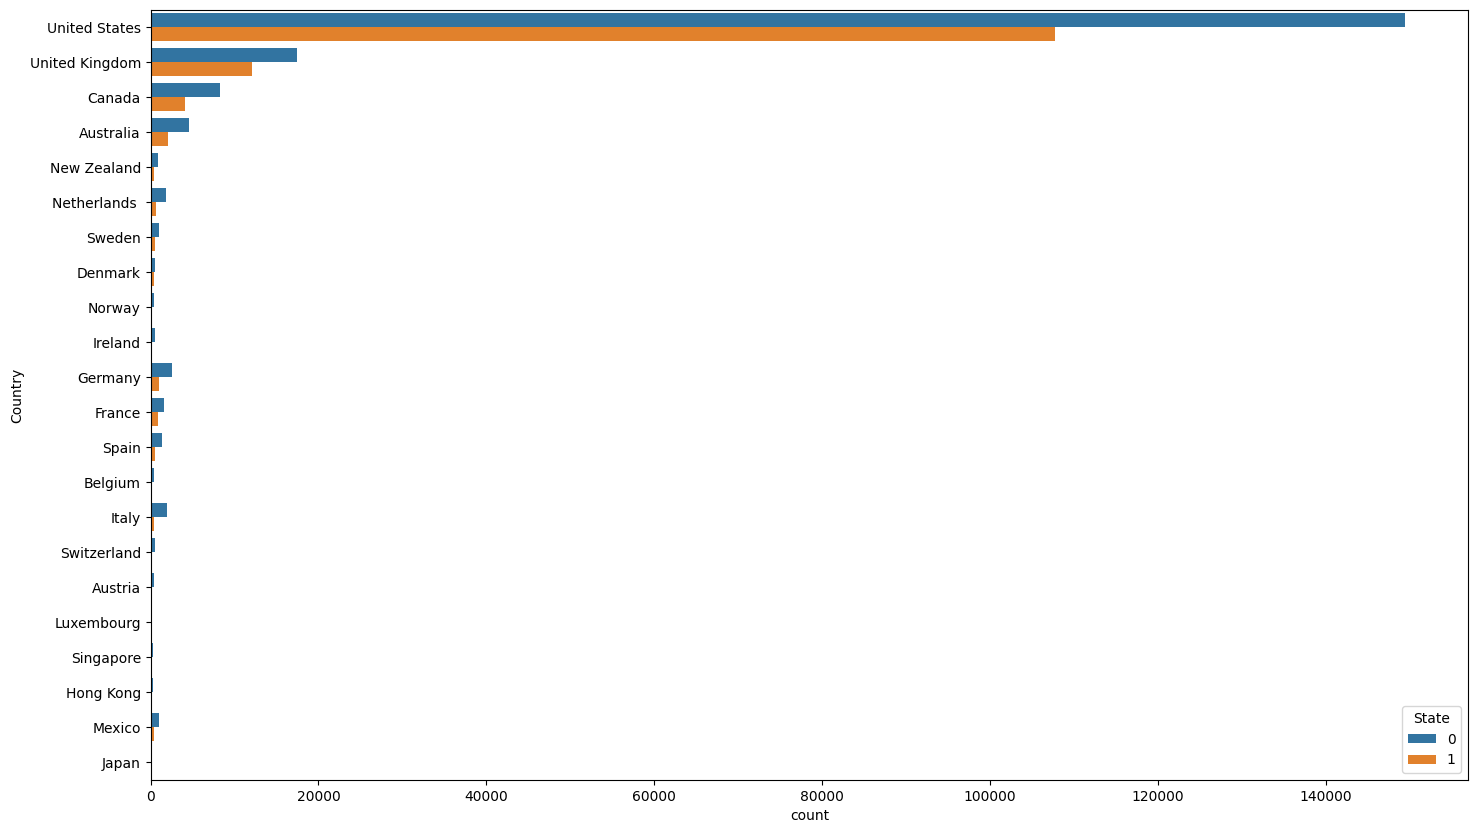

In [27]:
# by country
plt.figure(figsize=(17,10))
sns.countplot(y= df.Country , hue=df.State)

<Axes: xlabel='duration', ylabel='Count'>

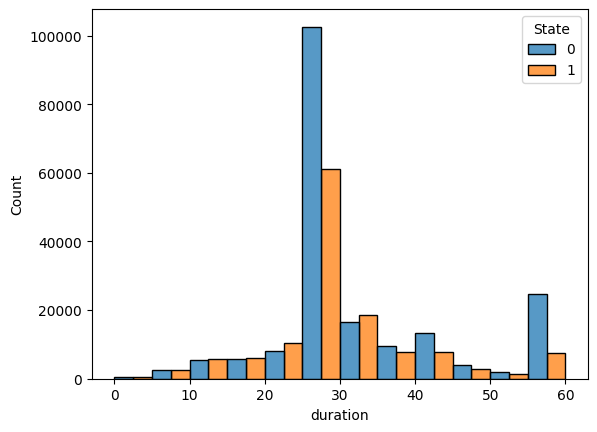

In [28]:
# by duration
sns.histplot(data = df, x="duration", hue="State", multiple="dodge", bins = 12)


<Axes: xlabel='Category', ylabel='count'>

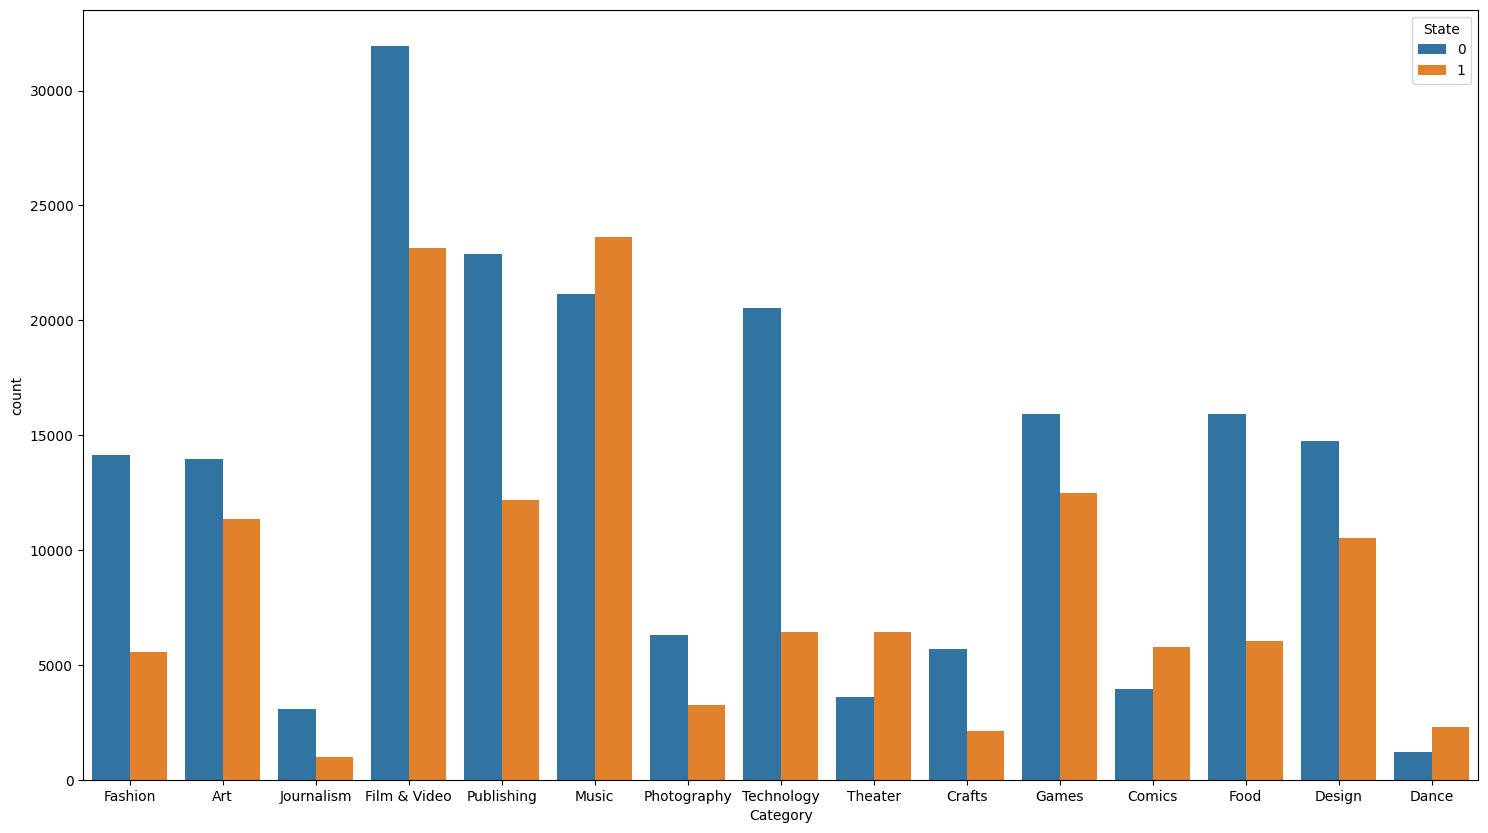

In [29]:
# by category
plt.figure(figsize=(18,10))
sns.countplot(x = df.Category , hue=df.State)

<Axes: xlabel='day_launched', ylabel='Count'>

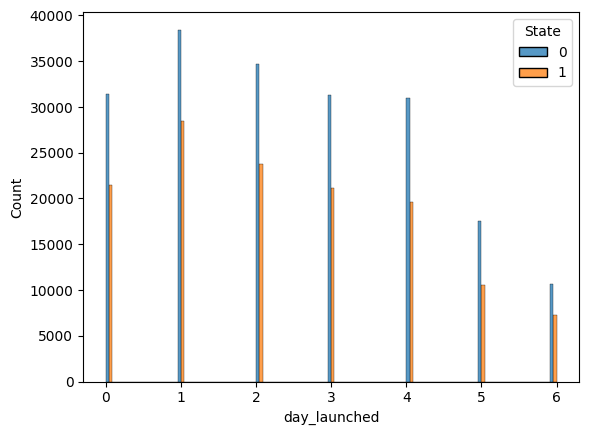

In [30]:
sns.histplot(data=df, x="day_launched", hue="State", multiple="dodge")

<Axes: title={'center': 'success rates per category'}, ylabel='Category'>

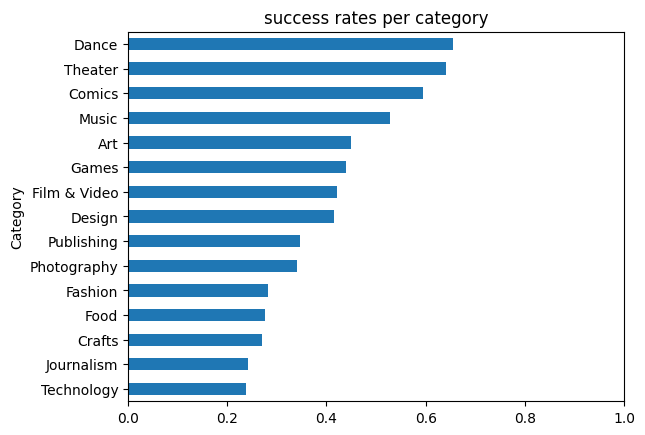

In [31]:
df.groupby("Category").State.mean().sort_values().plot(kind = "barh", xlim=[0,1], title="success rates per category")

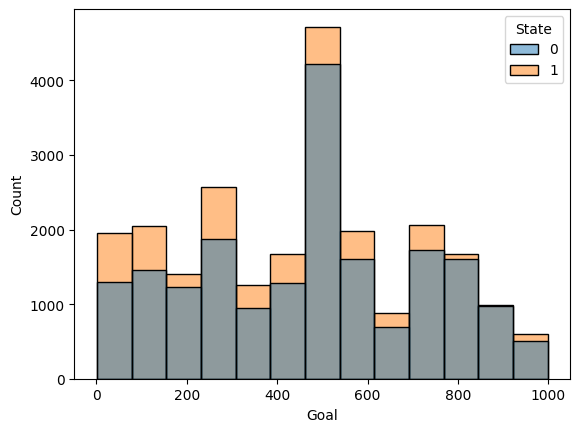

In [32]:
# by goal, with an upper limit
sns.histplot(data = df[df["Goal"] < 1000], x="Goal" , hue="State", bins=13);

<Axes: xlabel='Goal'>

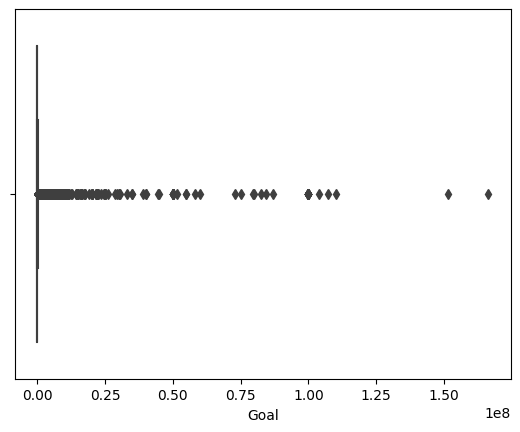

In [33]:
sns.boxplot(data = df, x = "Goal")

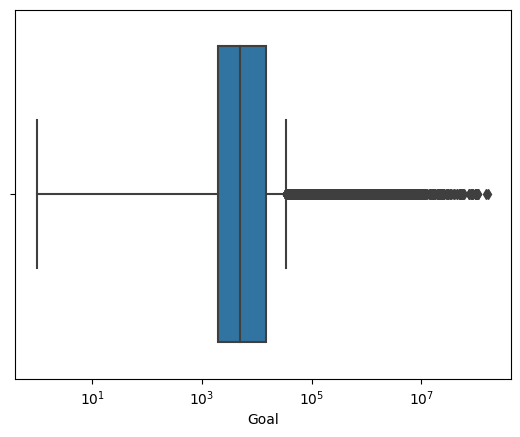

In [34]:
sns.boxplot(data = df, x = "Goal")
plt.xscale('log')

#### distribution of goals, original and log-scaled

<Axes: xlabel='Goal', ylabel='Count'>

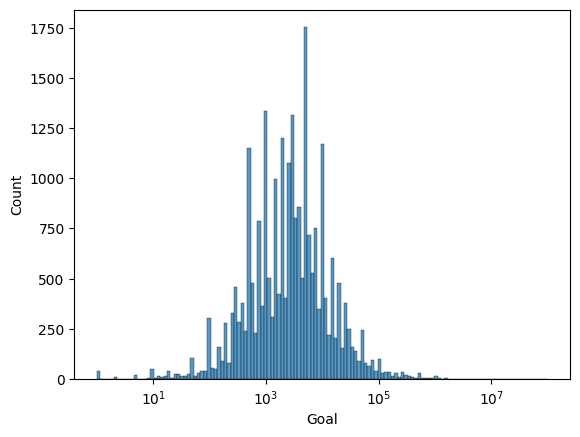

In [35]:
# log version of goal distribution for a given category 
sns.histplot(data = df.query("Category == 'Art'"), x = "Goal", log_scale = True)

<Axes: xlabel='goal_log', ylabel='Count'>

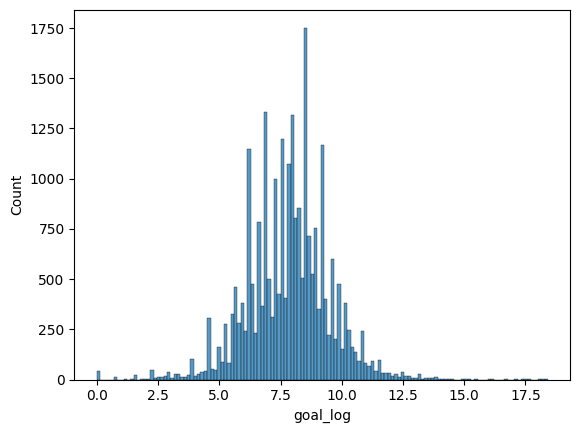

In [36]:
sns.histplot(data = df.query("Category == 'Art'"), x = "goal_log")

<Axes: ylabel='Frequency'>

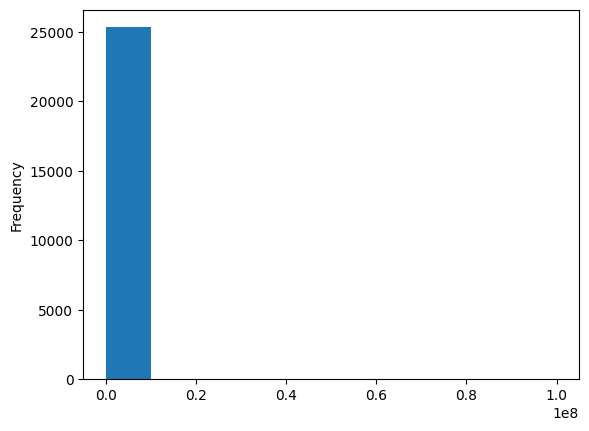

In [37]:
# non-log version of goal distribution
df.query("Category == 'Art'").Goal.plot(kind="hist")

#### EDA: outlier plotting

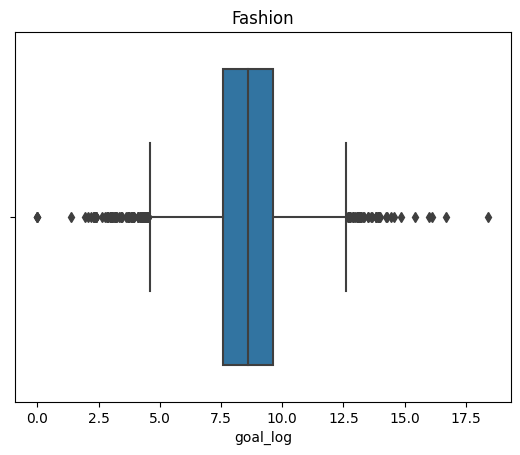

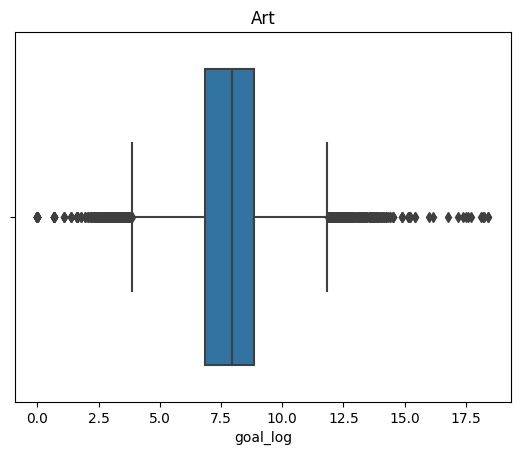

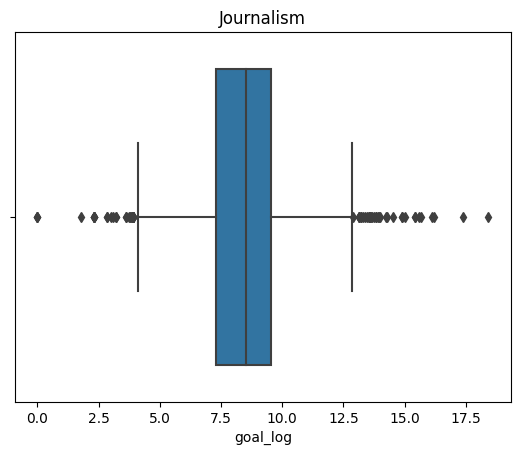

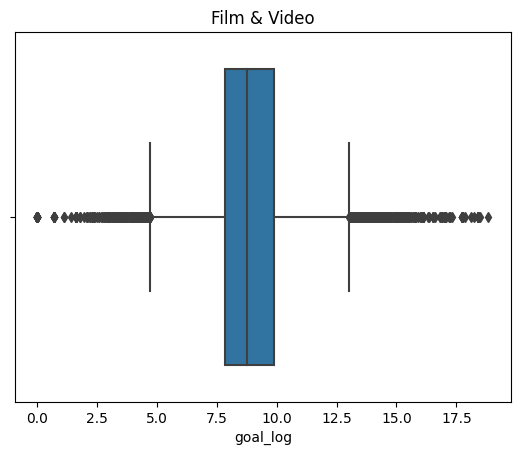

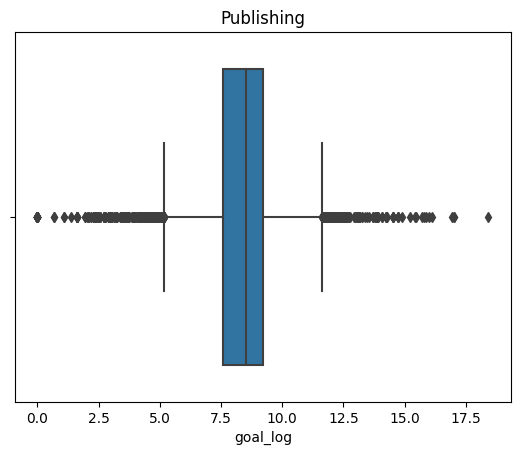

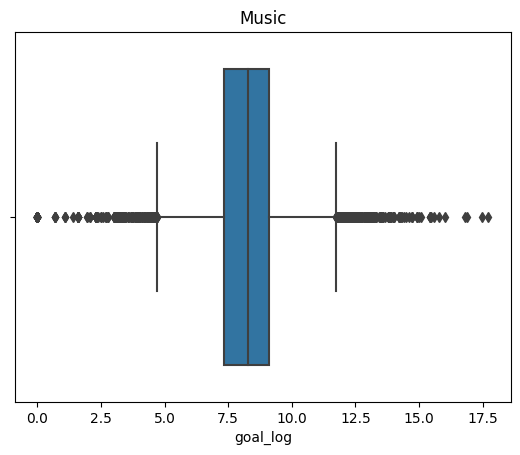

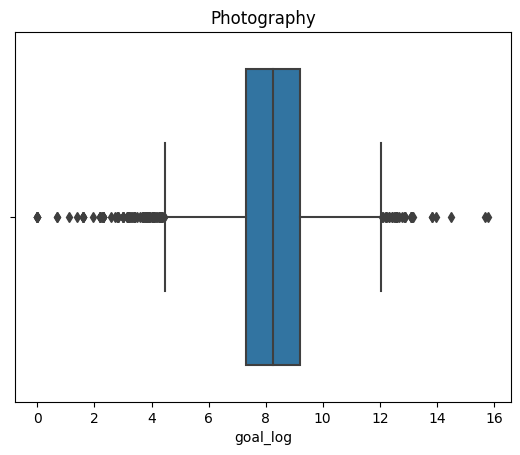

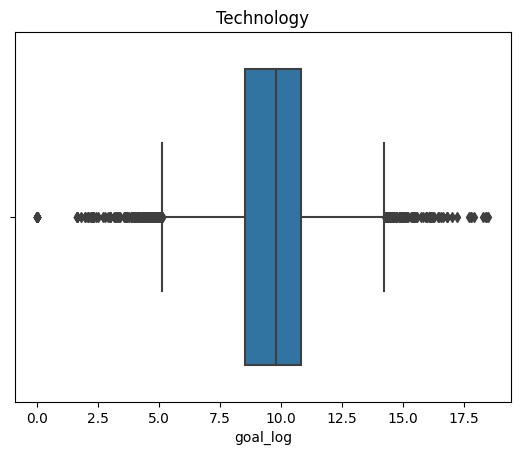

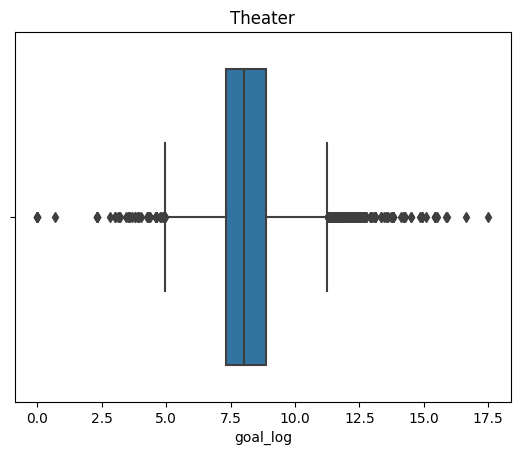

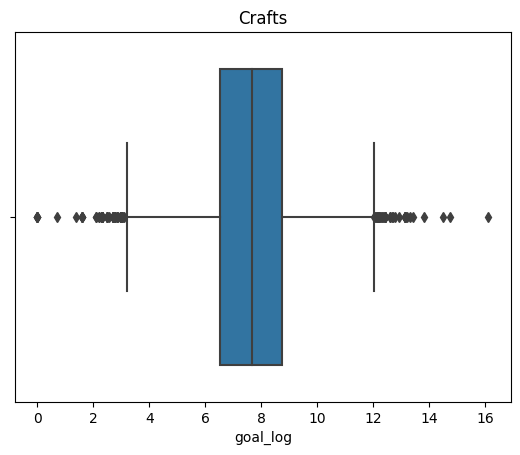

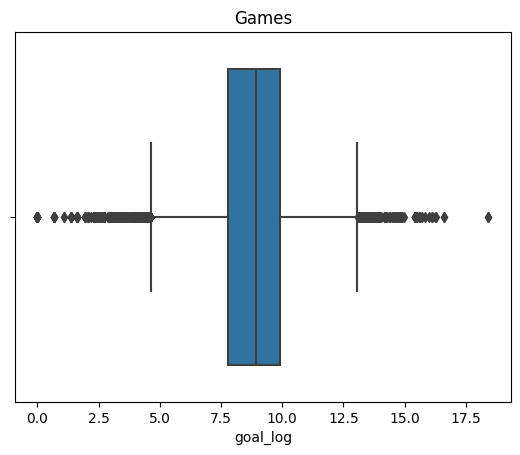

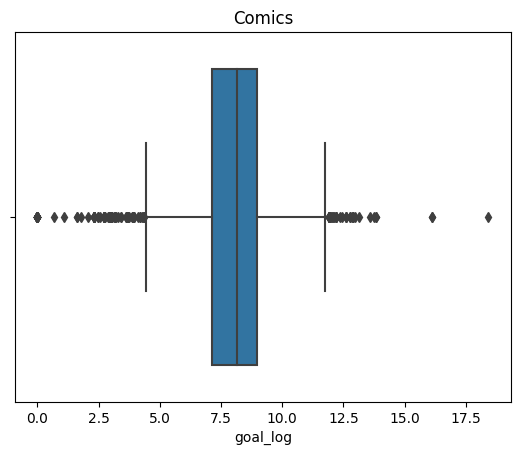

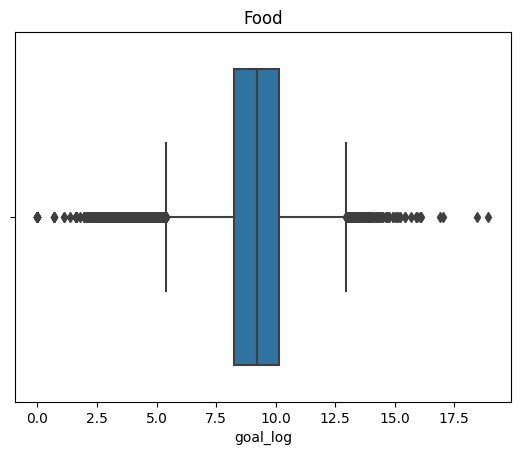

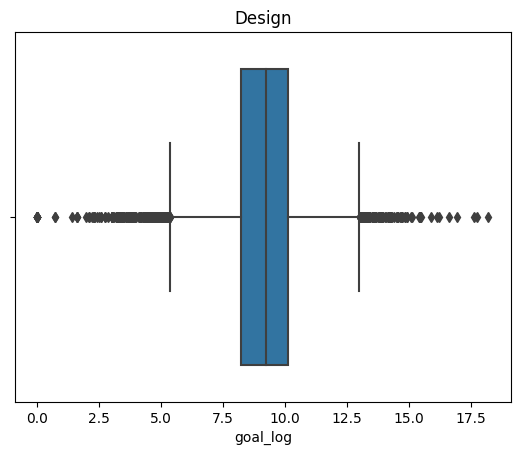

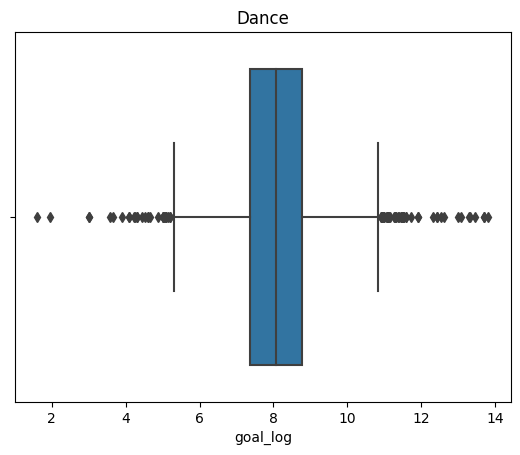

In [38]:
for category in categories:
    sns.boxplot(data = df.query('Category == @category'), x = 'goal_log')
    plt.title(category)
    plt.show()

# Creating a baseline model

### Metric
Recall, as to avoid false negatives

### Baseline Model (LOOK INTO THIS LATER- manual approach)

In [39]:
#create data frames for categories
df_film = df[df.Category.isin(["Film & Video"])]
df_music = df[df.Category.isin(["Music"])]
df_publishing = df[df.Category.isin(["Publishing"])]

<Axes: xlabel='duration', ylabel='Count'>

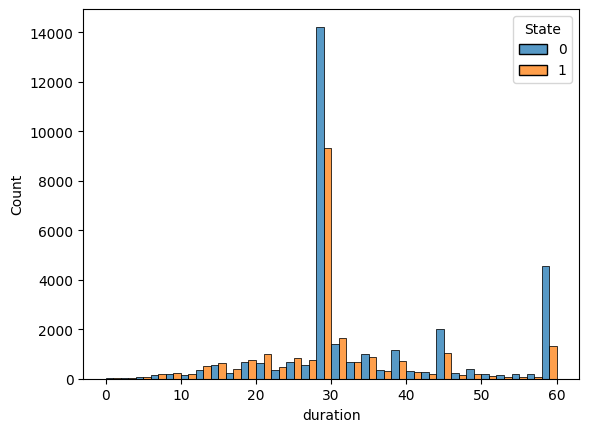

In [40]:
# plot data
sns.histplot(data=df_film,x='duration', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

<Axes: xlabel='duration', ylabel='Count'>

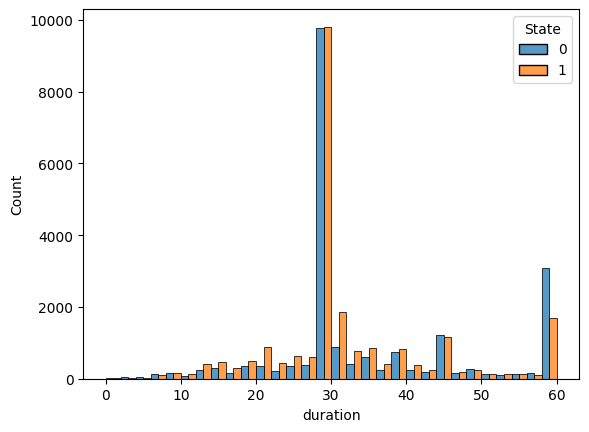

In [41]:
# plot data
sns.histplot(data=df_music,x='duration', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

<Axes: xlabel='duration', ylabel='Count'>

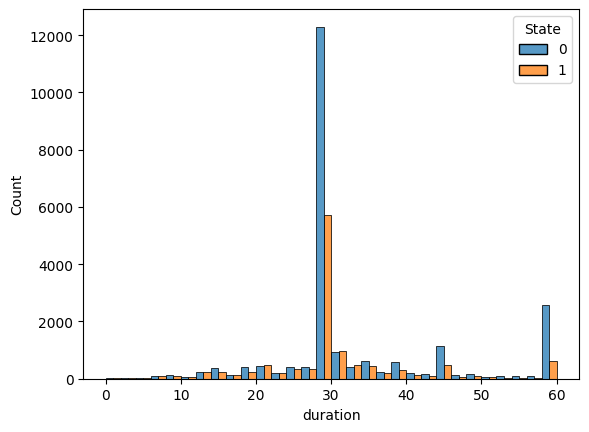

In [42]:
# plot data
sns.histplot(data=df_publishing,x='duration', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

<Axes: xlabel='Goal', ylabel='Count'>

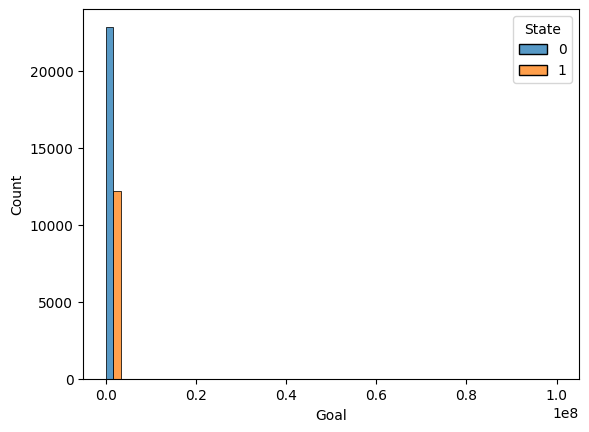

In [43]:
# plot data
sns.histplot(data=df_publishing,x='Goal', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

Set Cutoff for baseline model to 29 for all three models

## Final cleaning and feature selection

In [44]:
df.columns

Index(['ID', 'Name', 'Category', 'Subcategory', 'Country', 'Launched',
       'Deadline', 'Goal', 'Pledged', 'Backers', 'State', 'lon_launched',
       'time_launched', 'day_launched', 'hour', 'hour_sin', 'hour_cos',
       'weekday', 'duration', 'goal_log'],
      dtype='object')

In [45]:
feature_list = ["goal_log", "duration", "weekday", "hour_sin", "hour_cos"]

In [46]:
df[feature_list]

goal_log  duration weekday  hour_sin  hour_cos
0       6.907755        39       1 -0.707107  0.707107
2       2.995732         8       4 -0.707107  0.707107
4       7.549609        28       0 -0.500000 -0.866025
5       8.006368        17       1 -0.258819 -0.965926
6       5.298317        29       2  0.500000  0.866025
...          ...       ...     ...       ...       ...
374310  3.583519         2       5  0.500000 -0.866025
374400  5.602119         4       1 -0.258819 -0.965926
374458  5.298317         3       2  0.707107  0.707107
374530  5.521461         1       3  0.258819  0.965926
374605  5.971262         2       4  0.707107  0.707107

[327323 rows x 5 columns]

## Splitting the data

In [47]:
X = {}
Y = {}
for category in categories:
    df_temp = df[df.Category.isin([category])]
    X[category] = df_temp[feature_list]
    #X[category] = df_temp[.drop(columns='State')]
    Y[category] = df_temp.State

In [48]:
X_train = {}
X_test = {}
y_train = {}
y_test = {} 
for category in categories:
    X_train[category], X_test[category], y_train[category], y_test[category] = train_test_split(X[category], Y[category], test_size=0.20, random_state=42)

## Baseline model

In [49]:
y_baseline = {}
for category in categories:
    y_baseline[category] = X_test[category].duration.apply(lambda x:0 if x  > 29 else 1).values

In [50]:
recall_baseline = {}
for category in categories:
    recall_baseline[category] = recall_score(y_test[category], y_baseline[category], average='binary')  # Adjust 'average' as needed
    print(f"recall for category {category}: {recall_baseline[category]}")

recall for category Fashion: 0.6693620844564241
recall for category Art: 0.7200349956255468
recall for category Journalism: 0.7397959183673469
recall for category Film & Video: 0.6636402939904885
recall for category Publishing: 0.6603697749196141
recall for category Music: 0.6095338983050848
recall for category Photography: 0.6610942249240122
recall for category Technology: 0.5726429675425039
recall for category Theater: 0.6529459241323649
recall for category Crafts: 0.8175675675675675
recall for category Games: 0.7056
recall for category Comics: 0.6459948320413437
recall for category Food: 0.70926243567753
recall for category Design: 0.5532118887823586
recall for category Dance: 0.643312101910828


## Final cleaning + exploration: Outlier removal

We have identified the outliers BEFORE the split but do the removal AFTER the split.
Removing AFTER splitting is essential; we are not sure whether the identification should be before or after splitting or whether it doesn't matter. We leave it as it is.

In [51]:
df_train_wo_outlier = {}
y_train_wo_outlier = {}
X_train_wo_outlier = {}
for category in categories:
    df_train_wo_outlier[category] = X_train[category][(outliers_log_below[category] <= X_train[category].goal_log) & (X_train[category].goal_log <= outliers_log_above[category])]
    df_train_wo_outlier[category] = pd.merge(df_train_wo_outlier[category], y_train[category], left_index=True, right_index=True)
    y_train_wo_outlier[category] = df_train_wo_outlier[category]['State']
    X_train_wo_outlier[category] = df_train_wo_outlier[category].drop('State', axis=1)

#### data exploration AFTER outlier removal

<Axes: xlabel='goal_log', ylabel='Count'>

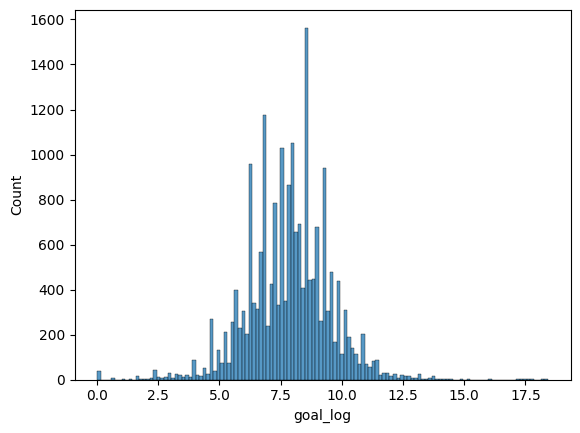

In [52]:
# BEFORE removal
sns.histplot(data = X_train["Art"], x = "goal_log")

<Axes: xlabel='goal_log', ylabel='Count'>

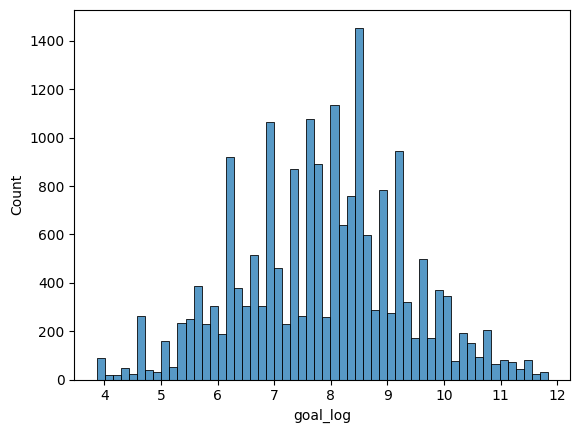

In [53]:
# AFTER removal
sns.histplot(data = X_train_wo_outlier["Art"], x = "goal_log")